In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14330, done.
remote: Total 14330 (delta 0), reused 0 (delta 0), pack-reused 14330
Receiving objects: 100% (14330/14330), 12.87 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (9776/9776), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
!pwd

/content/darknet


In [ ]:
!ls

In [ ]:
%cd ..

/content


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
!ls /mydrive/mask_detection_v2/mask_images/

In [ ]:
!pwd

In [ ]:
!cp -r '/mydrive/mask_detection_v2/mask_images' /content/darknet/data

In [ ]:
!cp /mydrive/mask_detection_v2/yolov3.cfg /content/darknet/cfg

In [ ]:
!cp /mydrive/mask_detection_v2/train.txt /content/darknet/data
!cp /mydrive/mask_detection_v2/test.txt /content/darknet/data

In [ ]:
!cp /mydrive/mask_detection_v2/obj.names /content/darknet/data
!cp /mydrive/mask_detection_v2/obj.data  /content/darknet/data

In [ ]:
%cd darknet

/content/darknet


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-10-10 06:28:48--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-10-10 06:28:48--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   133KB/s    in 18m 40s 

2020-10-10 06:47:31 (142 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 -map -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000715, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000003, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000009, iou_loss = 0.000000, total_loss = 0.000009 
 total_bbox = 716379, rewritten_bbox = 0.033921 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000017, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000005, iou_loss = 0.000000, total_loss = 0.000005 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.859319, GIOU: 0.856145), Class: 0.997314, Obj: 0.885681, No Obj:

In [ ]:
# !./darknet detector train data/obj.data cfg/yolov3.cfg /mydrive/mask_detection/backup/yolov3_last.weights -dont_show

In [ ]:
# METHOD 1 OF FINDING BOUNDING BOX

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]

  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

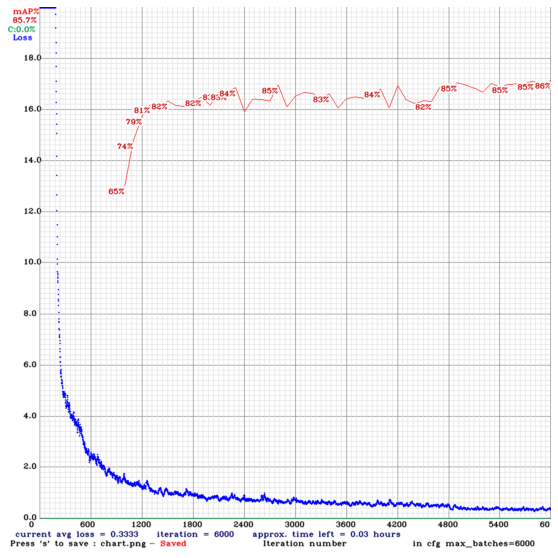

In [ ]:
imShow('chart.png')

In [ ]:
download('chart.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/darknet/cfg
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.604 BF
   8 Shortcut Layer: 5,  wt = 0, wn

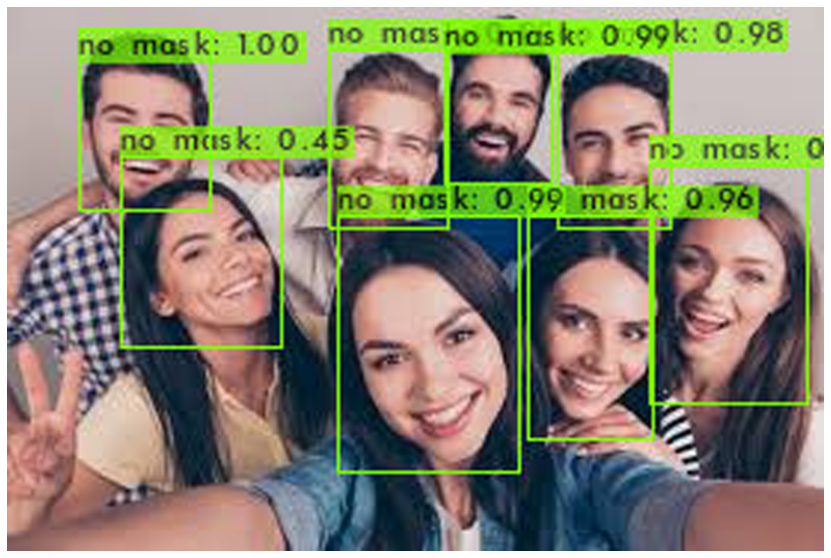

In [ ]:
# METHOD 1 OF FINDING BOUNDING BOX --continue
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3.cfg
%cd ..
!./darknet detector test data/obj.data cfg/yolov3.cfg /mydrive/mask_detection/backup/yolov3_final.weights '/mydrive/Test Images/images56tyg.jpg'
imShow('predictions.jpg')

Note: Method 2 of drawing bounding box will be used in local machine